In [1]:
!pip install web3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Historical data from binance

In this section we define a function to request historical data from Binance for a variety of frequencies ("1m", "5m", "10m", "15m", "1h", "6h", "12h", "1d"). We set initial_date = '31 Mar 2021' but we can change it.
[I use my private api keys]

In [3]:
!pip install python-binance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import math
import os.path
import time
from binance.client import Client as Client_binance
from datetime import timedelta, datetime
from dateutil import parser
from tqdm import tqdm_notebook #(Optional, used for progress-bars)

### API
binance_api_key = '9zFIgetckRO80d4RciWs8jc4XSwAMEnFIuwVhAoaYIstQ9RWlfqiV6zcAGu0Ta8R'    #Enter your own API-key here
binance_api_secret = 'Uu8vtNEmH1PPDPDchX51jivxBENEbNwDmDcQrnhPJBJwFcbqjnvxL2MeQJuTc4Kg' #Enter your own API-secret here

### CONSTANTS
binsizes = {"1m": 1, "5m": 5, "10m": 10, "15m": 15, "1h": 60, "6h": 360, "12h": 720, "1d": 1440}

batch_size = 750
binance_client = Client_binance(api_key=binance_api_key, api_secret=binance_api_secret)

# initial_date = '1 Jan 2017'
initial_date = '31 Mar 2021'
### FUNCTIONS
def minutes_of_new_data(symbol, kline_size, data, source):
    if len(data) > 0:  old = parser.parse(data["timestamp"].iloc[-1])
    elif source == "binance": old = datetime.strptime(initial_date, '%d %b %Y')
    if source == "binance": new = pd.to_datetime(binance_client.get_klines(symbol=symbol, interval=kline_size)[-1][0], unit='ms')
    return old, new

def get_all_binance(symbol, kline_size, save = False):
    filename = '%s-%s-data.csv' % (symbol, kline_size)
    if os.path.isfile(filename): data_df = pd.read_csv(filename)
    else: data_df = pd.DataFrame()
    oldest_point, newest_point = minutes_of_new_data(symbol, kline_size, data_df, source = "binance")
    delta_min = (newest_point - oldest_point).total_seconds()/60
    available_data = math.ceil(delta_min/binsizes[kline_size])
    if oldest_point == datetime.strptime(initial_date, '%d %b %Y'): print('Downloading all available %s data for %s. Be patient..!' % (kline_size, symbol))
    else: print('Downloading %d minutes of new data available for %s, i.e. %d instances of %s data.' % (delta_min, symbol, available_data, kline_size))
    klines = binance_client.get_historical_klines(symbol, kline_size, oldest_point.strftime("%d %b %Y %H:%M:%S"), newest_point.strftime("%d %b %Y %H:%M:%S"))
    data = pd.DataFrame(klines, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
    data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
    if len(data_df) > 0:
        temp_df = pd.DataFrame(data)
        data_df = data_df.append(temp_df)
    else: data_df = data
    data_df.set_index('timestamp', inplace=True)
    if save: data_df.to_csv(filename)
    print('All caught up..!')
    return data_df


We request historical data for ETHUSDC with 5m frequency.

In [5]:
# lista = ["ETHUSDC"]

# BTC ETH MATIC UNI COMP AAVE YFI CRV MKR LINK KP3R SFI SUSHI 1INCH CAKE 
symbol = "ETHUSDC"
# Frecuencia: 1m, 5m, 10m, 15m, 1h, 1d, 1m
freq = "5m"

# Descarga de datos
ETH_historical = get_all_binance(symbol, freq, save = True)

All caught up..!


In [6]:
len(ETH_historical)

133599

In [7]:
ETH_historical

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2021-03-31 00:00:00,1841.29,1845.35,1841.12,1845.35,13.4565,1617149099999,24811.47622,39,4.46207,8228.108687,0
2021-03-31 00:05:00,1844.39,1847.08,1843.99,1846.29,54.69818,1617149399999,100898.416,50,18.71127,34521.301061,0
2021-03-31 00:10:00,1845.54,1849.53,1845.54,1848.96,10.56434,1617149699999,19523.841834,31,6.35202,11739.724326,0
2021-03-31 00:15:00,1848.96,1850.35,1847.5,1847.5,126.93107,1617149999999,234808.651352,117,70.3571,130155.068172,0
2021-03-31 00:20:00,1848.12,1849.12,1846.0,1846.0,16.03979,1617150299999,29631.683226,61,3.04496,5630.118179,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-08 10:30:00,1227.68,1228.24,1225.95,1227.06,703.2574,1657276499999,863397.706219,482,88.5744,108687.32962,0
2022-07-08 10:35:00,1226.6,1227.52,1225.2,1226.99,45.5844,1657276799999,55908.656005,142,20.1877,24761.579377,0
2022-07-08 10:40:00,1226.68,1227.42,1225.48,1225.99,67.6957,1657277099999,83023.751227,169,44.6406,54743.785481,0


Given that we have too much data, we will stay with less data (say 2000 prices).

In [8]:
P_ETH = ETH_historical[-2000:]['close']
for i in range(len(P_ETH)):
  P_ETH[i] = float(P_ETH[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


## LTV calculator

Given

- $A=collateral$
- $D=borrowed\_capital / debt$
- $LTV=Loan\ to\ value$
- $LT$ liquidation threshold

then $LTV = \frac{D}{A}$ and we will be liquidated if $LTV > LT$.

In [9]:
def liquidation(collateral_ETH, P_ETH, Debt_USDC, LT):
  '''
  LT = liquidation threshold
  debt_value = Debt_USDC (in USDC)
  collateral_USDC = colateral_ETH * P_ETH
  liquidation if debt_value > collateral_USDC * LT iff debt_value / collateral_USDC = new_LTV > LT
  '''
  collateral_USDC = collateral_ETH * P_ETH
  new_LTV = Debt_USDC / collateral_USDC
  return new_LTV > LT

def LTV_(collateral_ETH, P_ETH, Debt_USDC):
  collateral_USDC = collateral_ETH * P_ETH
  LTV = Debt_USDC / collateral_USDC
  # P_ETH = Debt_USDC / (collateral_ETH * LT)
  return LTV

## DyDx

In [10]:
!pip install dydx-v3-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from dydx3 import Client as Client_dydx
from web3 import Web3
dydx_client = Client_dydx(host ='https://api.stage.dydx.exchange/')

In [12]:
# We bring the necessary parameters
market = dydx_client.public.get_markets()
dydx_info = pd.DataFrame.from_dict(market.data).T

In [13]:
dydx_ETH_USD_data = dydx_info['ETH-USD'][0]
dydx_ETH_USD_data

{'assetResolution': '1000000000',
 'baseAsset': 'ETH',
 'baselinePositionSize': '500',
 'incrementalInitialMarginFraction': '0.01',
 'incrementalPositionSize': '100',
 'indexPrice': '1223.2250',
 'initialMarginFraction': '0.05',
 'maintenanceMarginFraction': '0.03',
 'market': 'ETH-USD',
 'maxPositionSize': '10000',
 'minOrderSize': '0.01',
 'nextFundingAt': '2022-07-08T11:00:00.000Z',
 'nextFundingRate': '-0.0000117041',
 'openInterest': '9421.516',
 'oraclePrice': '1227.1700',
 'priceChange24H': '38.971500',
 'quoteAsset': 'USD',
 'status': 'ONLINE',
 'stepSize': '0.001',
 'syntheticAssetId': '0x4554482d3900000000000000000000',
 'tickSize': '0.1',
 'trades24H': '2018',
 'type': 'PERPETUAL',
 'volume24H': '26888699.765400'}

In [14]:
incrementalInitialMarginFraction = float(dydx_ETH_USD_data['incrementalInitialMarginFraction'])

initialMarginFraction = float(dydx_ETH_USD_data['initialMarginFraction'])
maintenanceMarginFraction = float(dydx_ETH_USD_data['maintenanceMarginFraction'])
oraclePrice = float(dydx_ETH_USD_data['oraclePrice'])
size_ETH = -7.2110
Initial_Margin_Requirement = abs(size_ETH * oraclePrice * initialMarginFraction)
Maintenance_Margin_Requirement = abs(size_ETH * oraclePrice * maintenanceMarginFraction)
Total_Initial_Margin_Requirement = Initial_Margin_Requirement
Total_Maintenance_Margin_Requirement = Maintenance_Margin_Requirement
margin = 4000
notional = 0
# notional = abs(size_ETH * oraclePrice)
total_account_value = margin + notional
Free_collateral = total_account_value - Total_Initial_Margin_Requirement
Close_price = oraclePrice * (1 + (maintenanceMarginFraction * total_account_value / Total_Maintenance_Margin_Requirement))

In [15]:
incrementalInitialMarginFraction,initialMarginFraction ,maintenanceMarginFraction

(0.01, 0.05, 0.03)

P is the oracle price for the market

M is the maintenance margin fraction for the market

V is the total account value, as defined above

W is the total maintentance margin requirement, as defined above

In [16]:
incrementalInitialMarginFraction

0.01

In [17]:
def short_pyl(size, P):
  '''
  P_entry, leverage are given and fixed
  '''
  return size * (short_entry_price - P) * short_leverage

## AAVE yields

In [18]:
def AAVE_profits(collateral_USDC, pcg_collateral_to_borrow,
                 supply_rate_ETH, supply_rewards_rate_ETH,
                 borrow_rate_USDC, borrow_rewards_rate_USDC):
  debt = collateral_USDC * pcg_collateral_to_borrow
  return collateral_USDC * (supply_rate_ETH + supply_rewards_rate_ETH) - debt * (borrow_rate_USDC - borrow_rewards_rate_USDC)

### Request borrow_rate + supply_rate

In [19]:
import json
#from google.colab import files
#uploaded = files.upload()
from binance.client import Client
import pandas as pd
from datetime import datetime
from web3 import Web3
#import pandas as pd


In [20]:
# Conectamos con el nodo
w3 = Web3(Web3.HTTPProvider("https://mainnet.infura.io/v3/da48e8cbe7ed479688437e27dd07fe8b"))
# Cargamos las address del contrato del tricrypto y del LP token
lending_pool_address = '0x7d2768dE32b0b80b7a3454c06BdAc94A69DDc7A9'
wETH_address = '0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2'
USDC_address = '0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48'
# Cargamos las abis de cada uno
pool_abi = '''
[{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":false,"internalType":"address","name":"user","type":"address"},{"indexed":true,"internalType":"address","name":"onBehalfOf","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"borrowRateMode","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"borrowRate","type":"uint256"},{"indexed":true,"internalType":"uint16","name":"referral","type":"uint16"}],"name":"Borrow","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":false,"internalType":"address","name":"user","type":"address"},{"indexed":true,"internalType":"address","name":"onBehalfOf","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"},{"indexed":true,"internalType":"uint16","name":"referral","type":"uint16"}],"name":"Deposit","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"target","type":"address"},{"indexed":true,"internalType":"address","name":"initiator","type":"address"},{"indexed":true,"internalType":"address","name":"asset","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"premium","type":"uint256"},{"indexed":false,"internalType":"uint16","name":"referralCode","type":"uint16"}],"name":"FlashLoan","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"collateralAsset","type":"address"},{"indexed":true,"internalType":"address","name":"debtAsset","type":"address"},{"indexed":true,"internalType":"address","name":"user","type":"address"},{"indexed":false,"internalType":"uint256","name":"debtToCover","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"liquidatedCollateralAmount","type":"uint256"},{"indexed":false,"internalType":"address","name":"liquidator","type":"address"},{"indexed":false,"internalType":"bool","name":"receiveAToken","type":"bool"}],"name":"LiquidationCall","type":"event"},{"anonymous":false,"inputs":[],"name":"Paused","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":true,"internalType":"address","name":"user","type":"address"}],"name":"RebalanceStableBorrowRate","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":true,"internalType":"address","name":"user","type":"address"},{"indexed":true,"internalType":"address","name":"repayer","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"}],"name":"Repay","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":false,"internalType":"uint256","name":"liquidityRate","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"stableBorrowRate","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"variableBorrowRate","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"liquidityIndex","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"variableBorrowIndex","type":"uint256"}],"name":"ReserveDataUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":true,"internalType":"address","name":"user","type":"address"}],"name":"ReserveUsedAsCollateralDisabled","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":true,"internalType":"address","name":"user","type":"address"}],"name":"ReserveUsedAsCollateralEnabled","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":true,"internalType":"address","name":"user","type":"address"},{"indexed":false,"internalType":"uint256","name":"rateMode","type":"uint256"}],"name":"Swap","type":"event"},{"anonymous":false,"inputs":[],"name":"Unpaused","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"reserve","type":"address"},{"indexed":true,"internalType":"address","name":"user","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"},{"indexed":false,"internalType":"uint256","name":"amount","type":"uint256"}],"name":"Withdraw","type":"event"},{"inputs":[],"name":"FLASHLOAN_PREMIUM_TOTAL","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"LENDINGPOOL_REVISION","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"MAX_NUMBER_RESERVES","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"MAX_STABLE_RATE_BORROW_SIZE_PERCENT","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"},{"internalType":"uint256","name":"interestRateMode","type":"uint256"},{"internalType":"uint16","name":"referralCode","type":"uint16"},{"internalType":"address","name":"onBehalfOf","type":"address"}],"name":"borrow","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"},{"internalType":"address","name":"onBehalfOf","type":"address"},{"internalType":"uint16","name":"referralCode","type":"uint16"}],"name":"deposit","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"address","name":"from","type":"address"},{"internalType":"address","name":"to","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"},{"internalType":"uint256","name":"balanceFromBefore","type":"uint256"},{"internalType":"uint256","name":"balanceToBefore","type":"uint256"}],"name":"finalizeTransfer","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"receiverAddress","type":"address"},{"internalType":"address[]","name":"assets","type":"address[]"},{"internalType":"uint256[]","name":"amounts","type":"uint256[]"},{"internalType":"uint256[]","name":"modes","type":"uint256[]"},{"internalType":"address","name":"onBehalfOf","type":"address"},{"internalType":"bytes","name":"params","type":"bytes"},{"internalType":"uint16","name":"referralCode","type":"uint16"}],"name":"flashLoan","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"getAddressesProvider","outputs":[{"internalType":"contract ILendingPoolAddressesProvider","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"}],"name":"getConfiguration","outputs":[{"components":[{"internalType":"uint256","name":"data","type":"uint256"}],"internalType":"struct DataTypes.ReserveConfigurationMap","name":"","type":"tuple"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"}],"name":"getReserveData","outputs":[{"components":[{"components":[{"internalType":"uint256","name":"data","type":"uint256"}],"internalType":"struct DataTypes.ReserveConfigurationMap","name":"configuration","type":"tuple"},{"internalType":"uint128","name":"liquidityIndex","type":"uint128"},{"internalType":"uint128","name":"variableBorrowIndex","type":"uint128"},{"internalType":"uint128","name":"currentLiquidityRate","type":"uint128"},{"internalType":"uint128","name":"currentVariableBorrowRate","type":"uint128"},{"internalType":"uint128","name":"currentStableBorrowRate","type":"uint128"},{"internalType":"uint40","name":"lastUpdateTimestamp","type":"uint40"},{"internalType":"address","name":"aTokenAddress","type":"address"},{"internalType":"address","name":"stableDebtTokenAddress","type":"address"},{"internalType":"address","name":"variableDebtTokenAddress","type":"address"},{"internalType":"address","name":"interestRateStrategyAddress","type":"address"},{"internalType":"uint8","name":"id","type":"uint8"}],"internalType":"struct DataTypes.ReserveData","name":"","type":"tuple"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"}],"name":"getReserveNormalizedIncome","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"}],"name":"getReserveNormalizedVariableDebt","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"getReservesList","outputs":[{"internalType":"address[]","name":"","type":"address[]"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"user","type":"address"}],"name":"getUserAccountData","outputs":[{"internalType":"uint256","name":"totalCollateralETH","type":"uint256"},{"internalType":"uint256","name":"totalDebtETH","type":"uint256"},{"internalType":"uint256","name":"availableBorrowsETH","type":"uint256"},{"internalType":"uint256","name":"currentLiquidationThreshold","type":"uint256"},{"internalType":"uint256","name":"ltv","type":"uint256"},{"internalType":"uint256","name":"healthFactor","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"user","type":"address"}],"name":"getUserConfiguration","outputs":[{"components":[{"internalType":"uint256","name":"data","type":"uint256"}],"internalType":"struct DataTypes.UserConfigurationMap","name":"","type":"tuple"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"address","name":"aTokenAddress","type":"address"},{"internalType":"address","name":"stableDebtAddress","type":"address"},{"internalType":"address","name":"variableDebtAddress","type":"address"},{"internalType":"address","name":"interestRateStrategyAddress","type":"address"}],"name":"initReserve","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"contract ILendingPoolAddressesProvider","name":"provider","type":"address"}],"name":"initialize","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"collateralAsset","type":"address"},{"internalType":"address","name":"debtAsset","type":"address"},{"internalType":"address","name":"user","type":"address"},{"internalType":"uint256","name":"debtToCover","type":"uint256"},{"internalType":"bool","name":"receiveAToken","type":"bool"}],"name":"liquidationCall","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"paused","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"address","name":"user","type":"address"}],"name":"rebalanceStableBorrowRate","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"},{"internalType":"uint256","name":"rateMode","type":"uint256"},{"internalType":"address","name":"onBehalfOf","type":"address"}],"name":"repay","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"configuration","type":"uint256"}],"name":"setConfiguration","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"bool","name":"val","type":"bool"}],"name":"setPause","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"address","name":"rateStrategyAddress","type":"address"}],"name":"setReserveInterestRateStrategyAddress","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"bool","name":"useAsCollateral","type":"bool"}],"name":"setUserUseReserveAsCollateral","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"rateMode","type":"uint256"}],"name":"swapBorrowRateMode","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"asset","type":"address"},{"internalType":"uint256","name":"amount","type":"uint256"},{"internalType":"address","name":"to","type":"address"}],"name":"withdraw","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"}]
'''

In [21]:
# Info del pool
# Conectamos con los contratos
pool_contract = w3.eth.contract(address=lending_pool_address, abi=pool_abi)

USDC_reserve_data=pool_contract.functions['getReserveData'](USDC_address).call()
USDC_liquidity_index = USDC_reserve_data[1] / 10**18
USDC_variable_borrow_index = USDC_reserve_data[2] / 10**18
USDC_liquidity_rate = USDC_reserve_data[3] / 10**27
USDC_variable_borrow_rate = USDC_reserve_data[4] / 10**27
USDC_stable_borrow_rate = USDC_reserve_data[5] / 10**27
wETH_reserve_data=pool_contract.functions['getReserveData'](wETH_address).call()
wETH_liquidity_index = wETH_reserve_data[1] / 10**18
wETH_variable_borrow_index = wETH_reserve_data[2] / 10**18
wETH_liquidity_rate = wETH_reserve_data[3] / 10**27
wETH_variable_borrow_rate = wETH_reserve_data[4] / 10**27
wETH_stable_borrow_rate = wETH_reserve_data[5] / 10**27

## Strategy and algorithmic idea


1. Use the staked ETH to borrow 10% USDC from Aave (For example, $1000 worth of ETH staked to take out 100 USDC)

2. Use the USDC to open a short position (preferably stop limit) on DyDx with 10x leverage (10 x 10 = 100% of staked ETH amount)

3. Find a threshold to keep cashing out the short profit and adding it back to the collateral to prevent liquidation (Max borrow amount on Aave is 80%)

Let's define the intervals in which the price could fall. At first we will have the following fixed intervals. Although they could change as a function of the ETH volatility, but let's assume they are fixed in order to understand the procedure.

- $I_{out} = [P_{trigger}, \infty]$
- $I_{trigger} = [P_{stop}, P_{trigger}]$
- $I_{limit} = [P_{floor}, P_{stop}]$
- $I_{entry} = [P_{LTV\_AAVE}^{(0)}, P_{floor}]$
- $I_i = [P_{LTV\_AAVE}^{(i+1)}, P_{LTV\_AAVE}^{(i)}]$

Given that it isn't the same the direction from which the price enters into the intervals and that we should be aware of the interval in which the price falls (in order to know the actual border price and therefor being able to update all the parameters), we have to define a way track price movement direction. We will do this by defining

- I_current: the current interval where the price is
- I_previous: the interval where the last price read by the bot was
- I_old: the last interval which was different than the current interval (we will use this to track price movement direction)

So, 

- if I_previous = I_current we do nothing bc the price is just moving in this interval
- if I_previous != I_current it means the price changed interval
  
  - if I_old < I_current it means the price is rising and we have two actions to take: Close the short position or Reduce collateral + Increase short size

    - if I_old <= I_limit & I_current >= I_trigger (ie P >= P_stop and increasing) ---> Close the short position
    [Note that we check the inequalities in order to contemplate price jumps]
    - if I_old is in {I_i} (ie P is crossing the LTV intervals while increasing) ---> Reduce the AAVE collateral and increase the short_ETH postion.

  - if I_old > I_current it means the price is decreasing and we have two actions to take: Open the short position or Reduce the short size + Increase collateral
    - if I_old >= I_limit & I_current <= I_entry (ie P <= P_floor and decreasing) ---> Open the short position
    - if I_current is in {I_i} (ie P is crossing the LTV intervals while decreasing) ---> Reduce the short_ETH position and increase the AAVE collateral.



For every new market price we have to check in which situation of the previous ones we are and update the parameters as follows

- increase_collateral: We have to reduce the position in DyDx letting only the necessary to repay the debt and update all DyDx parameters, increase the colateral in AAVE by the $partial\_pyl$ amount and update AAVE parameters. As we show next:
  \begin{align*}
  \large\text{DyDx parameters} \\
    size_{ETH} &\leftarrow \frac{Debt+fees}{P_{LTV\_AVVE}-P_{entry\_DyDx}} \\
    equity &\leftarrow Equity(size_{ETH}, P) \\
    P_{Liquidation\_DyDx} &\leftarrow P\_liquidation\_DyDX\_function(equity,P)\\
    partial\_pyl &\leftarrow pyl(size_{ETH}\_previous-size_{ETH},P) \\
    partial\_pyl\_ETH &\leftarrow partial\_pyl / P\\
  \large\text{AAVE parameters} \\
    collateral\_ETH &\leftarrow collateral\_ETH\_previous + partial\_pyl\_ETH \\
    LTV &\leftarrow LTV\_function(collateral\_ETH, P) \\
    P_{LTV\_AAVE} &\leftarrow P\_liquidation\_AAVE\_function(P_{LTV\_AAVE\_previous}, size_{ETH}, r_L, r_B) \\
  \end{align*}

- reduce_collateral: We have to reduce the collateral in AAVE and increase the position in DyDx, and update the parameters:
  \begin{align*}
  \large\text{AAVE parameters} \\
    stk &\leftarrow stk\_previous \\
    P_{LTV\_AAVE} &\leftarrow P_{LTV\_AAVE\_previous}\\
    LTV &\leftarrow LTV(stk, P) \\
  \large\text{DyDx parameters} \\
    size_{ETH} &\leftarrow size_{ETH}+ (stk\_previous - stk)\\
    equity &\leftarrow Equity(size_{ETH}, P) \\
    P_{Liquidation\_DyDx} &\leftarrow P\_liquidation\_DyDX\_function(equity,P)
  \end{align*}

## Algo

### Initial Values

Let's start by defining the functions we'll use to update the parameters.

In [141]:
# AAVE functions
Coll_USD = lambda coll, P: coll * P
fees_function = lambda coll,r_L, r_B: coll * (r_L-r_B * 0.1)
LTV_function = lambda coll, P: Debt / Coll_USD(coll,P)

# DyDx functions
pnl = lambda size_ETH, P: size_ETH * (P-P_entry_DyDx)
Notional = lambda size_ETH, P: abs(size_ETH)*P
Equity = lambda size_ETH, P: margin + pnl(size_ETH,P)
leverage = lambda size_ETH, P: Notional(size_ETH,P) / Equity(size_ETH, P)


# AAVE LTV Limits and DyDx Liquidation Price
P_LTV_AAVE_function = lambda previous_LTV_price, size_ETH, coll, r_L, r_B: previous_LTV_price - ( pnl(size_ETH, previous_LTV_price) + Debt + fees_function(coll, r_L,r_B) ) / coll
P_liquidation_DyDx_function = lambda Equity, P: P * (1 + (maintenanceMarginFraction * Equity / Total_Maintenance_Margin_Requirement))
P_to_cover_AAVE_debt_function = lambda size_ETH, coll, r_L, r_B, pcg_of_debt_to_cover: P_entry_DyDx + ( Debt + fees_function(coll, r_L, r_B) ) * pcg_of_debt_to_cover / size_ETH 

Let's look at the historical prices of ETH in order to find some relevant initial values for the parameters.

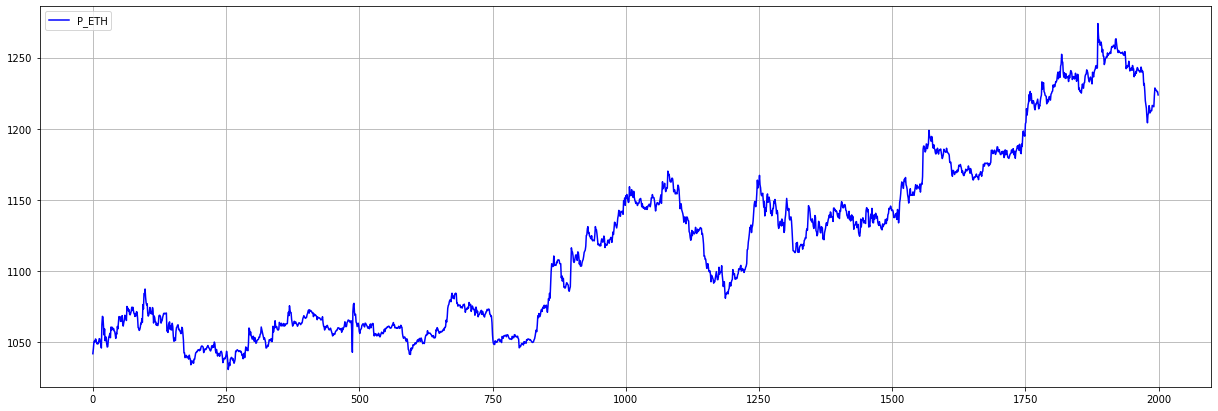

In [23]:
fig, axs = plt.subplots(1,1, figsize = (21, 7))
axs.plot(list(P_ETH), label = 'P_ETH', c = 'blue')
axs.grid()
axs.legend(loc = 'upper left')

Let's define first all the necessary parameters and functions. We need initial values for

- Staked ETH = stk
- P_floor
- P_stop = P_floor * 1.01
- P_trigger = P_floor * 1.05

- AAVE_parameters: 
  - P_entry_AAVE ~ P_stop (ex P_stop * 1.001)
  - Collateral in ETH = coll, 
  - Debt in USDC = Debt,
  - LTV value = LTV, 
  - Price for LTV limit in AAVE = P_LTV_AAVE,
  - Rates for lending ETH and borrowing USDC = r_L, r_B;

- DyDx_parameters: 
  - P_entry_DyDx ~ P_floor (ex P_floor * 1.001)
  - Short size in ETH = size_ETH,
  - Margin = margin,
  - Notional = notional,
  - Equity = equity,
  - leverage = leverage,
  - Price for liquidation in DyDx = P_liquidation_DyDx.

Let's try the algo with some test values. Again, just to try the algo we will define all the LTV price limits and DyDx liquidation prices in advance and as fixed. Later, they will be defined in real time and change dynamically as price changes.

In [152]:
# Staked ETH
stk = 1

P_floor = 1060
P_stop = P_floor * 1.01
P_trigger = P_floor * 1.05

# AAVE parameters
P_entry_AAVE = P_stop * 1.001
coll = stk
Debt = stk * P_entry_AAVE * 0.1
LTV = LTV_function(coll,P_entry_AAVE)

# For now let's use some fixed arbitrary values for P_LTV_AAVE in order to see if everything works. Changing this later wont be a problem as everything was thought to be variable
P_LTV_AAVE = [round(P_entry_AAVE *0.99,3)]
for i in range(5):
  P_LTV_AAVE.append(round(P_LTV_AAVE[i] * 0.995,3))
r_L = 0
r_B = 0

# DyDx parameters
P_entry_DyDx = P_floor * 1.001
size_ETH = -coll
margin = Debt
notional = Notional(size_ETH, P_entry_DyDx)
equity = Equity(size_ETH, P_entry_DyDx)
L = leverage(size_ETH, P_entry_DyDx)

# For now let's use some fixed arbitrary values for P_liquidation_DyDx
# P_liquidation_DyDx = [P_entry_DyDx *1.01]
# for i in range(5):
#   P_liquidation_DyDx.append(round(P_liquidation_DyDx[i] * 1.005,3))

P_to_cover_AAVE_debt = P_to_cover_AAVE_debt_function(size_ETH, coll, r_B, r_L, 1.5)

In [154]:
P_floor, P_stop, P_trigger, P_entry_AAVE, Debt, P_to_cover_AAVE_debt

(1060, 1070.6, 1113.0, 1071.6705999999997, 107.16705999999998, 900.30941)

In [150]:
P_to_cover_AAVE_debt

900.30941

We show that the prices crosses the relevant prices several times.

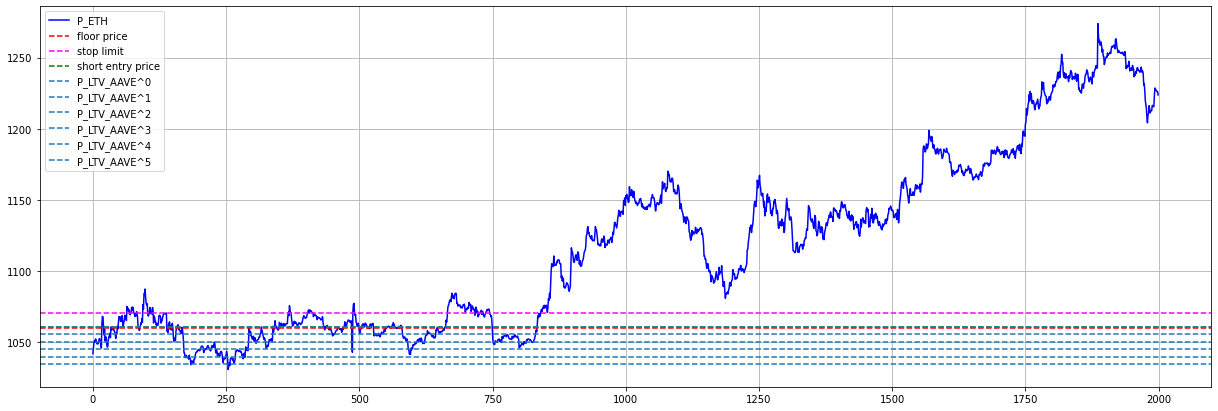

In [155]:
fig, axs = plt.subplots(1,1, figsize = (21, 7))
axs.plot(list(P_ETH), label = 'P_ETH', c = 'blue')
axs.axhline(y = P_floor, color = 'r', linestyle = '--', label = 'floor price')
axs.axhline(y = P_stop, color = 'magenta', linestyle = '--', label = 'stop limit')
axs.axhline(y = P_entry_DyDx, color = 'green', linestyle = '--', label = 'short entry price')
for i in range(len(P_LTV_AAVE)):
  p = P_LTV_AAVE[i]
  axs.axhline(y = p, linestyle = '--', label = 'P_LTV_AAVE^'+str(i))
axs.grid()
axs.legend(loc = 'upper left')

In [116]:
P_floor, P_stop, P_entry_DyDx

(1060, 1070.6, 1061.06)

Let's define the initial values of AAVE and DyDx parameters. Take into account that the first market_price isn't exactly the first historical market price but the entry price for each.

In [144]:
AAVE_parameters_initial = {'.market_price':P_entry_AAVE,
                          #  '.interval': I_limit,
                           'coll': coll,
                           'Debt': Debt,
                           'LTV': LTV,
                           'P_LTV_AAVE': P_LTV_AAVE[0],
                           'lend rate':0,
                           'borrow rate':0}
DyDx_parameters_initial = {'.market_price':P_entry_DyDx,
                          #  '.interval': I_entry,
                           'size_ETH': size_ETH,
                           'equity': equity,
                           'notional': notional,
                           'leverage': L}
                          #  'P_liquidation_DyDx': P_liquidation_DyDx[0]}
AAVE_parameters_initial,DyDx_parameters_initial

({'.market_price': 1071.6705999999997,
  'Debt': 10716.705999999998,
  'LTV': 0.10000000000000002,
  'P_LTV_AAVE': 1060.954,
  'borrow rate': 0,
  'coll': 100,
  'lend rate': 0},
 {'.market_price': 1061.06,
  'equity': 10716.705999999998,
  'leverage': 9.900990099009903,
  'notional': 106106.0,
  'size_ETH': -100})

Now we define all the intervals where price cuold fall. Note that we use math.inf as the right border of I_out to contemplate all prices above P_trigger.

In [118]:
import math 
I_out = [P_trigger, math.inf]
I_trigger = [P_stop, P_trigger]
I_limit = [P_floor, P_stop]
I_entry = [P_LTV_AAVE[0], P_floor]
for i in range(len(P_LTV_AAVE)-1):
  globals()["I_LTV_" + str(i)] = [P_LTV_AAVE[i+1],P_LTV_AAVE[i]]
globals()["I_LTV_" + str(len(P_LTV_AAVE)-1)] = [0,P_LTV_AAVE[len(P_LTV_AAVE)-1]]
# for i in range(len(P_liquidation_DyDx)-1):
#   globals()["I_DyDx_" + str(i)] = [P_liquidation_DyDx[i],P_liquidation_DyDx[i+1]]
# globals()["I_" + str(len(P_liquidation_DyDx)-1)] = [0,P_liquidation_DyDx[len(P_liquidation_DyDx)-1]]

In [119]:
intervals = {}
intervals["I_entry"]=I_entry
intervals["I_limit"]=I_limit
intervals["I_trigger"]=I_trigger
intervals["I_out"]=I_out
LTV_intervals = {}
# DyDx_intervals = {}
for i in range(len(P_LTV_AAVE)):
  intervals["I_LTV_" + str(i)]=globals()["I_LTV_" + str(i)]
  LTV_intervals["I_LTV_" + str(i)]=globals()["I_LTV_" + str(i)]
# for i in range(len(P_liquidation_DyDx)-1):
#   intervals["I_DyDx_" + str(i)]=globals()["I_DyDx_" + str(i)]
#   DyDx_intervals["I_DyDx_" + str(i)]=globals()["I_DyDx_" + str(i)]

In [120]:
LTV_intervals

{'I_LTV_0': [1055.649, 1060.954],
 'I_LTV_1': [1050.371, 1055.649],
 'I_LTV_2': [1045.119, 1050.371],
 'I_LTV_3': [1039.893, 1045.119],
 'I_LTV_4': [1034.694, 1039.893],
 'I_LTV_5': [0, 1034.694]}

In [121]:
intervals

{'I_LTV_0': [1055.649, 1060.954],
 'I_LTV_1': [1050.371, 1055.649],
 'I_LTV_2': [1045.119, 1050.371],
 'I_LTV_3': [1039.893, 1045.119],
 'I_LTV_4': [1034.694, 1039.893],
 'I_LTV_5': [0, 1034.694],
 'I_entry': [1060.954, 1060],
 'I_limit': [1060, 1070.6],
 'I_out': [1113.0, inf],
 'I_trigger': [1070.6, 1113.0]}

Now that we defined the intervals we can add the entry interval to the AAVE and DyDx dictionaries.

In [136]:
AAVE_parameters_initial['.interval_name'] = 'I_trigger'
DyDx_parameters_initial['.interval_name'] = 'I_limit'

Let's now define a summary with the historical data. This is useful in order to run the algo. The 'interval_name' feature is just because is easier to understand the interval in which the price falls by reading its name than by remembering the interval values.

In [123]:
summary = {'market_price': P_ETH,
           'price_in_interval': [[0,0]]*len(P_ETH),
           'interval_name': ['0']*len(P_ETH)}

In [124]:
for loc in range(len(summary['market_price'])):
  P = summary['market_price'][loc]
  for i in range(len(intervals.keys())):
    if intervals[list(intervals.keys())[i]][0] < P <= intervals[list(intervals.keys())[i]][1]:
      summary['price_in_interval'][loc] = intervals[list(intervals.keys())[i]]
      summary['interval_name'][loc] = list(intervals.keys())[i]

In [125]:
summary_df = pd.DataFrame.from_dict(summary)
summary_df.iloc[250:260]

,market_price,price_in_interval,interval_name
timestamp,,,
2022-07-02 09:05:00,1041.06,"[1039.893, 1045.119]",I_LTV_3
2022-07-02 09:10:00,1043.66,"[1039.893, 1045.119]",I_LTV_3
2022-07-02 09:15:00,1041.19,"[1039.893, 1045.119]",I_LTV_3
2022-07-02 09:20:00,1037.64,"[1034.694, 1039.893]",I_LTV_4
2022-07-02 09:25:00,1030.88,"[0, 1034.694]",I_LTV_5
2022-07-02 09:30:00,1033.01,"[0, 1034.694]",I_LTV_5
2022-07-02 09:35:00,1035.44,"[1034.694, 1039.893]",I_LTV_4
2022-07-02 09:40:00,1033.64,"[0, 1034.694]",I_LTV_5
2022-07-02 09:45:00,1038.15,"[1034.694, 1039.893]",I_LTV_4


Something we have to figure out is the criteria for reducing the collateral once the price starts growing. In order to finish the modules with test values, what we do is the following. Once the price starts growing and it changed intervals we
  - Find the last time the price was in I_current
  - Update all the parameters using the values they had that last time
So, the idea here is that as we start the strategy when price is moving down, by the time it starts going up it should fall in previously visited intervals. It means that if we can somehow store the old data, we can re-use it.

In order to store data we will define one dictionary for AAVE and one for DyDx with all the historical parameters, and then we will convert them to dataframes (bc is easier to fill them up as the simulations moves forward). Note that we will also add two keys for
  - market price: to have the history of the changes according to every price in our data
  - interval: this is necessary to find the last time the price was in I_current (we will find in the AAVE historical data frame the indexes that matches with I_current, and for those indexes we will use the 'collateral' columns values).

In the future these parameters will probably change for every new price.

In [145]:
AAVE_historical = {'.market_price': P_ETH,
                   '.interval_name': summary['interval_name'],
                   'coll': [coll]*len(P_ETH),
                   'Debt': [0] * len(P_ETH),
                   'LTV': [LTV]*len(P_ETH),
                   'P_LTV_AAVE': [P_LTV_AAVE[0]]*len(P_ETH),
                   'lend rate':0*P_ETH,
                   'borrow rate':0*P_ETH}
DyDx_historical = {'.market_price':P_ETH,
                   '.interval_name': summary['interval_name'],
                   'size_ETH': 0*P_ETH,
                   'equity': 0*P_ETH,
                   'notional': 0*P_ETH,
                   'leverage': 0*P_ETH}
                  #  'P_liquidation_DyDx': 0*P_ETH}

In [146]:
AAVE_historical_df = pd.DataFrame.from_dict(AAVE_historical)
DyDx_historical_df = pd.DataFrame.from_dict(DyDx_historical)
AAVE_historical_df.iloc[0] = AAVE_parameters_initial
DyDx_historical_df.iloc[0] = DyDx_parameters_initial

In [147]:
AAVE_historical_df

,.market_price,.interval_name,coll,Debt,LTV,P_LTV_AAVE,lend rate,borrow rate
timestamp,,,,,,,,
2022-07-01 12:15:00,1071.6706,NaN,100,10716.706,0.1,1060.954,0.0,0.0
2022-07-01 12:20:00,1045.35,I_LTV_2,100,0.000,0.1,1060.954,0.0,0.0
2022-07-01 12:25:00,1050.03,I_LTV_2,100,0.000,0.1,1060.954,0.0,0.0
2022-07-01 12:30:00,1050.96,I_LTV_1,100,0.000,0.1,1060.954,0.0,0.0
2022-07-01 12:35:00,1050.19,I_LTV_2,100,0.000,0.1,1060.954,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-07-08 10:30:00,1227.06,I_out,100,0.000,0.1,1060.954,0.0,0.0
2022-07-08 10:35:00,1226.99,I_out,100,0.000,0.1,1060.954,0.0,0.0
2022-07-08 10:40:00,1225.99,I_out,100,0.000,0.1,1060.954,0.0,0.0


In [132]:
DyDx_historical_df

,.market_price,.interval_name,size_ETH,equity,notional,leverage
timestamp,,,,,,
2022-07-01 12:15:00,1061.06,I_limit,-100,10716.706,106106.0,9.90099
2022-07-01 12:20:00,1045.35,I_LTV_2,0.0,0.0,0.0,0.0
2022-07-01 12:25:00,1050.03,I_LTV_2,0.0,0.0,0.0,0.0
2022-07-01 12:30:00,1050.96,I_LTV_1,0.0,0.0,0.0,0.0
2022-07-01 12:35:00,1050.19,I_LTV_2,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2022-07-08 10:30:00,1227.06,I_out,0.0,0.0,0.0,0.0
2022-07-08 10:35:00,1226.99,I_out,0.0,0.0,0.0,0.0
2022-07-08 10:40:00,1225.99,I_out,0.0,0.0,0.0,0.0


### Modules

Next we define a function to compare intervals. Note that if this function return False it is the same as beeing I_1 > I_2 because all the intervals are disjoint.

In [39]:
# note that if this function return False it is the same as beeing I_1 > I_2 because all the intervals are disjoint
def is_lower(I_1, I_2):
  if I_1[1] <= I_2[0]:
    return True
  else:
    return False

Next, we define the different modules for the algo

- stgy_1(): Will simulate the bot action for the historical data P
- scenarios(): Will compare the intervals and return the updated parameters and values
- update(): Will update the parameters and values with respect to the case scenario received from scenarios().

In [62]:
def stgy_1(market_prices, intervals):
  I_old = I_out
  AAVE_parameters = AAVE_historical_df.iloc[0]
  DyDx_parameters = DyDx_historical_df.iloc[0]
  for i in range(1,len(market_prices)-1):
    I_previous = intervals[i-1]
    # P_previous = P[i-1]
    I_current = intervals[i]
    P = market_prices[i]
    # We could pass the whole AAVE_historical_df, DyDx_historical_df as parameters for scenarios if necessary
    AAVE_parameters_aux, DyDx_parameters_aux = scenarios(P,
                                                 I_old, I_current,
                                                 AAVE_historical_df.iloc[i-1], DyDx_historical_df.iloc[i-1])
    AAVE_historical_df.iloc[i] = AAVE_parameters_aux
    DyDx_historical_df.iloc[i] = DyDx_parameters_aux
    if I_previous != I_current:
      I_old = I_previous

In [41]:
def close_short(P, size_ETH):
  short_status = False
  return short_status, pnl(size_ETH, P)
def open_short():
  short_status = True
  return short_status

In [106]:
intervals

{'I_LTV_0': [1055.649, 1060.9538939999998],
 'I_LTV_1': [1050.371, 1055.649],
 'I_LTV_2': [1045.119, 1050.371],
 'I_LTV_3': [1039.893, 1045.119],
 'I_LTV_4': [1034.694, 1039.893],
 'I_LTV_5': [0, 1034.694],
 'I_entry': [1060.9538939999998, 1060],
 'I_limit': [1060, 1070.6],
 'I_out': [1113.0, inf],
 'I_trigger': [1070.6, 1113.0]}

In [157]:
def scenarios(P, # current values
              I_old, I_current,
              AAVE_parameters, DyDx_parameters): # intervals
  p_AAVE, interval_AAVE, coll, Debt, LTV, P_LTV_AAVE, r_L, r_B = AAVE_parameters
  p_DyDx, interval_DyDx, size_ETH, equity, notional, L = DyDx_parameters
  # We update only the first two parameters
  I_current_name = list(intervals.keys())[list(intervals.values()).index(I_current)]
  DyDx_parameters = [P, I_current_name, size_ETH, equity, notional, L]
  AAVE_parameters = [P, I_current_name, coll, Debt, LTV, P_LTV_AAVE, r_L, r_B]
  # P increasing
  # if I_old < I_current:
  if is_lower(I_old, I_current):

    # Case: Short position close
    # if (I_old <= I_limit) & (I_current >= I_trigger):
    if (is_lower(I_old, I_limit)) & (is_lower(I_trigger, I_current)):
      short_status, DyDx_pnl = close_short(P, size_ETH)
      # we update DyDx parameters as they became 0
      # size_ETH, equity, notional, L, P_liquidation_DyDx = [0,0,0,0,0]
      DyDx_parameters = [P, I_current_name, 0,0,0,0]
      AAVE_parameters = [P, I_current_name, coll, Debt, LTV, P_LTV_AAVE, r_L, r_B]
    
    # We figured out that it isnt necessary to do nothing if price starts going up that's why we comment these lines
    # elif I_old in LTV_intervals.values():
    #   # AAVE_parameters, DyDx_parameters = update(coll, Debt, r_L, r_B, P_LTV_AAVE, # AAVE parameters
    #   #        size_ETH, # DyDx parameter
    #   #        case = "reduce_collateral") # Case
    #   AAVE_parameters_aux, DyDx_parameters_aux = update(AAVE_parameters, DyDx_parameters,I_current,
    #   case = "reduce_collateral") # Case
    #   AAVE_parameters = AAVE_parameters_aux
    #   AAVE_parameters[0] = P
    #   AAVE_parameters[1] = I_current
    #   DyDx_parameters = DyDx_parameters_aux
    #   DyDx_parameters[0] = P
    #   DyDx_parameters[1] = I_current
   
  # P decreasing
  else:
    # Case: Short position open
    # if (I_old >= I_limit) & (I_current <= I_entry):
    if (is_lower(I_limit, I_old)) & (is_lower(I_current, I_entry)):
      short_status = open_short()
      # we dont have to update any parameter
      # AAVE_parameters[0] = P
      # AAVE_parameters[1] = I_current
      # DyDx_parameters[0] = P
      # DyDx_parameters[1] = I_current
    
    # If price keeps falling we have to
      # - pay the debt and release the stk ETH in AAVE as soon as our pnl is enough to cover it
      # - manage our LTV limit
    elif P <= P_to_cover_AAVE_debt:
      AAVE_parameters_aux, DyDx_parameters_aux = pay_debt(P, AAVE_parameters, DyDx_parameters)
      AVE_parameters = AAVE_parameters_aux
      DyDx_parameters = DyDx_parameters_aux
    elif (I_current in LTV_intervals.values()) & (Debt > 0):
      # AAVE_parameters, DyDx_parameters = update(coll, Debt, r_L, r_B, P_LTV_AAVE, # AAVE parameters
      #        size_ETH, # DyDx parameter
      #        case = "increase_collateral") # Case
      AAVE_parameters_aux, DyDx_parameters_aux = update(AAVE_parameters, DyDx_parameters,I_current,
      case = "increase_collateral") # Case
      AAVE_parameters = AAVE_parameters_aux
      # AAVE_parameters[0] = P
      # AAVE_parameters[1] = I_current
      DyDx_parameters = DyDx_parameters_aux
      # DyDx_parameters[0] = P
      # DyDx_parameters[1] = I_current
                                                
  return AAVE_parameters, DyDx_parameters

In [156]:
def pay_debt(P, AAVE_parameters, DyDx_parameters):
  p_AAVE, interval_AAVE, coll, Debt, LTV, P_LTV_AAVE, r_L, r_B = AAVE_parameters
  p_DyDx, interval_DyDx, size_ETH, equity, notional, L = DyDx_parameters
  #
  fees = fees_function(coll, r_L, r_B)
  new_size_ETH = (Debt + fees) / (P-P_entry_DyDx)
  partial_pnl = pnl(size_ETH - new_size_ETH, P)
  Debt = Debt + fees - partial_pnl
  size_ETH = size_ETH - new_size_ETH
  equity = Equity(size_ETH,P)
  notional = Notional(size_ETH, P)
  L = leverage(size_ETH, P)
  # Note that a negative Debt is actually a profit
  # We update the parameters
  AAVE_parameters_aux = [p_AAVE, interval_AAVE, coll, Debt, LTV, P_LTV_AAVE, r_L, r_B]
  DyDx_parameters_aux = [p_DyDx, interval_DyDx, size_ETH, equity, notional, L]

  return AAVE_parameters_aux, DyDx_parameters_aux

In [110]:
def update(AAVE_parameters, DyDx_parameters,I_current,
    #coll, Debt, r_L, r_B, P, # AAVE parameters
     #       size_ETH,
           case): # DyDx parameters
  p_AAVE, interval_AAVE, coll, Debt, LTV, P_LTV_AAVE, r_L, r_B = AAVE_parameters
  p_DyDx, interval_DyDx, size_ETH, equity, notional, L = DyDx_parameters
  
  if case == 'increase_collateral': 
    # we probably have to change P_LTV_AAVE for market_price, bc the bot could execute in a slightly diffent price than P_LTV_AAVE
    # DyDx parameters first
    size_ETH_old = size_ETH
    size_ETH = (Debt + fees_function(coll, r_L, r_B)) / (P - P_entry_DyDx)
    equity = Equity(size_ETH,P)
    notional = Notional(size_ETH, P)
    L = leverage(size_ETH, P)
    # P_liquidation_DyDx = P_liquidation_DyDx_function(equity,P)
    partial_pnl = pnl(size_ETH_old-size_ETH,P)
    partial_pnl_ETH = partial_pnl / P

    # AAVE parameter now
    coll = coll+partial_pnl_ETH
    LTV = LTV_function(coll, P)
    P_LTV_AAVE = P_LTV_AAVE_function(P,size_ETH, coll, r_L,r_B)
  
  elif case == 'reduce_collateral':
    # AAVE parameters first
    # coll_usd_limit = Debt / 0.1
    # coll_ETH_limit = coll_usd_limit / P
    aux_coll = coll
    # We set the next coll as the value it had the last time P 
    # AAVE_index_of_I_current = AAVE_historical_df.index[AAVE_historical_df['.interval'] == I_current].tolist() this doesn't work because I_current is a list and AAVE_historical_df is a df, we have to use list comprehension
    AAVE_indexes_equal_I_current = [interval == I_current for interval in AAVE_historical_df['.interval']]
    AAVE_index_of_I_current = AAVE_historical_df.index[AAVE_indexes_equal_I_current].tolist()
    coll = AAVE_historical_df.loc[AAVE_index_of_I_current]['coll'][0]  
    add_to_size_ETH = aux_coll - coll
    P_LTV_AAVE = P
    LTV = LTV_function(coll, P_LTV_AAVE) # 

    # DyDx parameters now
    size_ETH = size_ETH + add_to_size_ETH
    equity = Equity(size_ETH,P_LTV_AAVE)
    # P_liquidation_DyDx = P_liquidation_DyDx_function(equity,P)

  AAVE_parameters_aux = [p_AAVE, interval_AAVE, coll, Debt, LTV, P_LTV_AAVE, r_L, r_B]
  DyDx_parameters_aux = [p_DyDx, interval_DyDx, size_ETH, equity, notional, L]

  return AAVE_parameters_aux, DyDx_parameters_aux

### Simulations

Let's run the algo using the summary we defined earlier.

In [148]:
stgy_1(summary['market_price'],summary['price_in_interval'])

In [149]:
AAVE_historical_df

,.market_price,.interval_name,coll,Debt,LTV,P_LTV_AAVE,lend rate,borrow rate
timestamp,,,,,,,,
2022-07-01 12:15:00,1071.6706,NaN,100.000000,10716.706,0.100000,1060.954000,0.0,0.0
2022-07-01 12:20:00,1045.35,I_LTV_2,100.000000,10716.706,0.100000,1060.954000,0.0,0.0
2022-07-01 12:25:00,1050.03,I_LTV_2,100.000000,10716.706,0.100000,1060.954000,0.0,0.0
2022-07-01 12:30:00,1050.96,I_LTV_1,100.000000,10716.706,0.100000,1060.954000,0.0,0.0
2022-07-01 12:35:00,1050.19,I_LTV_2,77.947714,10716.706,0.112347,948.788343,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-07-08 10:30:00,1227.06,I_out,77.947714,10716.706,0.112347,948.788343,0.0,0.0
2022-07-08 10:35:00,1226.99,I_out,77.947714,10716.706,0.112347,948.788343,0.0,0.0
2022-07-08 10:40:00,1225.99,I_out,77.947714,10716.706,0.112347,948.788343,0.0,0.0


In [112]:
DyDx_historical_df

,.market_price,.interval_name,size_ETH,equity,notional,leverage
timestamp,,,,,,
2022-07-01 12:15:00,1061.06,I_limit,-100,10716.706,106106.0,9.90099
2022-07-01 12:20:00,1045.35,I_LTV_2,-100,10716.706,106106.0,9.90099
2022-07-01 12:25:00,1050.03,I_LTV_2,-100,10716.706,106106.0,9.90099
2022-07-01 12:30:00,1050.96,I_LTV_1,-100,10716.706,106106.0,9.90099
2022-07-01 12:35:00,1050.19,I_LTV_2,-985.897516,21433.412,1035379.712432,48.306808
...,...,...,...,...,...,...
2022-07-08 10:30:00,1227.06,I_out,198.531049,21433.412,221370.06036,10.32827
2022-07-08 10:35:00,1226.99,I_out,198.531049,21433.412,221370.06036,10.32827
2022-07-08 10:40:00,1225.99,I_out,198.531049,21433.412,221370.06036,10.32827


Let's now define a plot function to see how our parameters evolve as price changes.

In [45]:
def plot_(P, intervals):
  stgy_1(P,intervals)
  pnl_ = pnl(list(DyDx_historical_df['size_ETH']), P)
  fig, axs = plt.subplots(1,1, figsize = (21, 7))
  axs.plot(list(P), label = 'market price')
  axs.plot(list(pnl_), label = 'DyDx pnl')
  axs.grid()
  axs.legend(loc = 'lower left')

In [46]:
DyDx_historical_df

,.market_price,.interval,size_ETH,equity,notional,leverage,P_liquidation_DyDx
timestamp,,,,,,,
2022-07-01 12:15:00,1061.06,"[1060, 1070.6]",-100,10716.706,106106.0,9.90099,1071.6706
2022-07-01 12:20:00,1045.35,"[1045.119, 1050.371]",-100,10716.706,106106.0,9.90099,1071.6706
2022-07-01 12:25:00,1050.03,"[1045.119, 1050.371]",-100,10716.706,106106.0,9.90099,1071.6706
2022-07-01 12:30:00,1050.96,"[1050.371, 1055.649]",-100,10716.706,106106.0,9.90099,1071.6706
2022-07-01 12:35:00,1050.19,"[1045.119, 1050.371]",65.867892,21433.412,80606.4913,3.760787,4187.822388
...,...,...,...,...,...,...,...
2022-07-08 10:30:00,1227.06,"[1113.0, inf]",65.867892,21433.412,80606.4913,3.760787,4187.822388
2022-07-08 10:35:00,1226.99,"[1113.0, inf]",65.867892,21433.412,80606.4913,3.760787,4187.822388
2022-07-08 10:40:00,1225.99,"[1113.0, inf]",65.867892,21433.412,80606.4913,3.760787,4187.822388


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/usr/local/lib/python3.7/dist-packages/pandas/core/internals/blocks.py:937: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


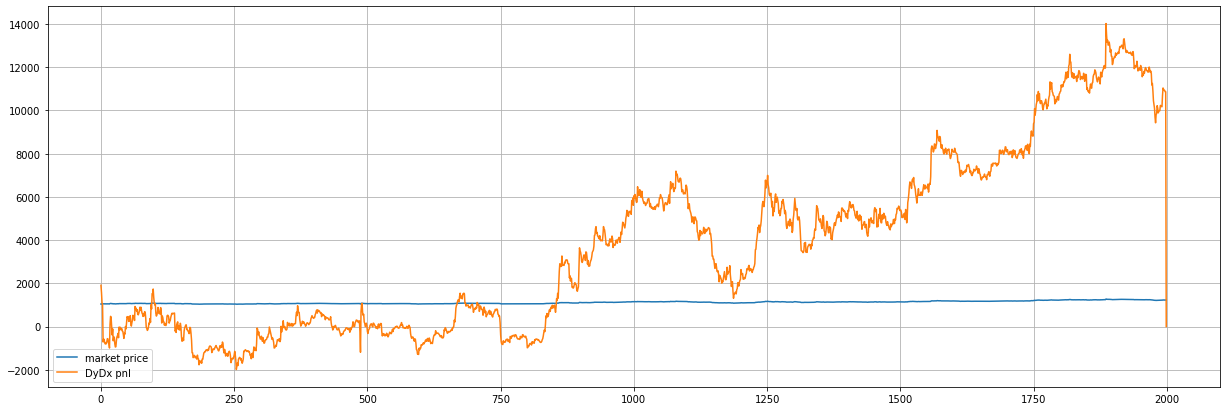

In [47]:
plot_(summary['market_price'],summary['price_in_interval'])